In [1]:
"""
This script performs data analysis and model training using a sample dataset.

- Reads the dataset from a CSV file.
- Visualizes data and performs linear regression analysis.
- Splits the dataset into training and testing sets.
- Trains a linear regression model and evaluates it using R-squared score.

Libraries used:
- pandas
- matplotlib
- seaborn
- scikit-learn
"""
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns

%matplotlib inline

df = pd.read_csv("./sample1.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


# New York Rental Dataset Analysis

This notebook analyzes the rental dataset of Newyork neighbourhood using the CRISP-DM framework which will have below steps:

1. **BUSINESS UNDERSTANDING**
2. **DATA UNDERSTANDING**
3. **DATA PREPARATION**
4. **DATA MODELING**
5. **EVALUATE THE RESULTS**
---

# Step 1: Business Understanding

We will explore the NY Rental dataset to get insights on below:

**1. Can we predict listing prices with a Linear Regression model?**

**2. Which neighbourhood are most common?**

**3. Relation between reviews and price?**

# Step 2: Data Understanding

In [2]:
# View information about a DataFrame including the index dtype
# and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

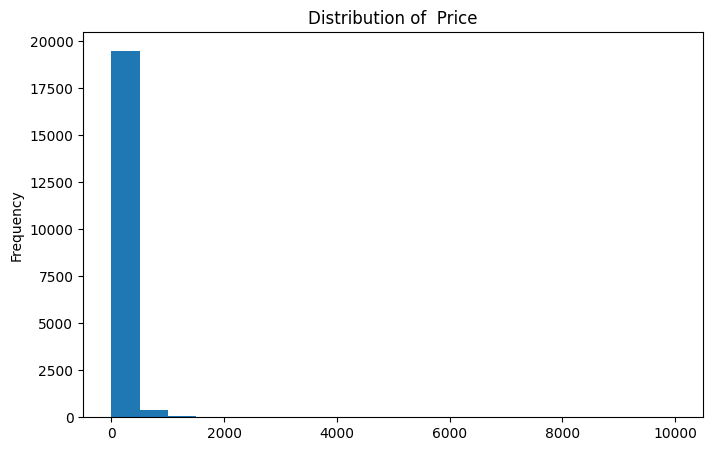

In [3]:
# Understand the distribtion of  price / target variable


plt.rcParams["figure.figsize"] = (8.0, 5.0)
df.price.plot(kind="hist", bins=20)
plt.title("Distribution of  Price")
plt.show()

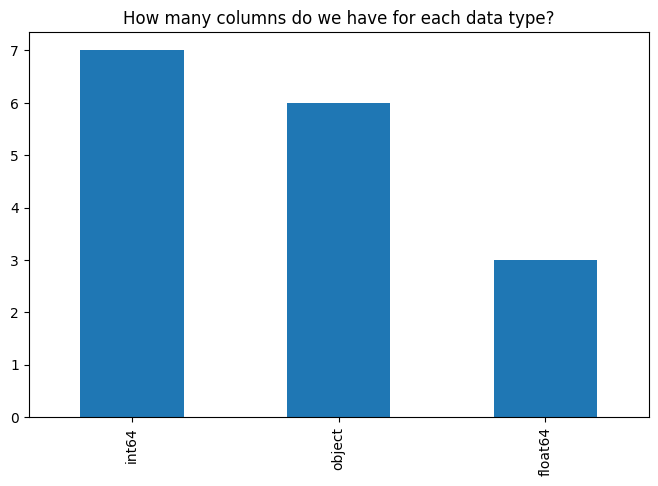

In [4]:
# For better understanding the dataset and to get idea
# of datacleaning & data preparation check the data type:

# Lets take a look at the number of columns we have for each data type

df.dtypes.value_counts().plot(kind="bar")
plt.title("How many columns do we have for each data type?");

In [5]:
# Looks like most of our data is string.
# We will need to one hot encode some of this data for categorical
# model features.
# And some of this text data will be dropped as it is not
# useful for training a statistical model.

# Step 3: Data Preparation

In [6]:
# Check for the missing data

In [7]:
# Calculate and display the percentage of null values for each column

# Count the number of missing values for each column
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)

# Calculate the percentage of missing values for each column
null_series = df.isnull().sum().div(len(df)).sort_values(ascending=False).head(50)

# Display columns with missing values and percentages
columns_with_null = len(null_series[null_series > 0])
columns_with_high_null = len(null_series[null_series > 0.10])

print(f"There are {columns_with_null} columns with at least 1 missing value")
print(
    f"There are {columns_with_high_null} columns " f"with at least 10% missing values"
)

# Show columns with more than 10% missing values
print("Shown below are columns with at least 10% missing values:")
print(null_series[null_series > 0.10])

# Display dataset summary information
df.info()

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64
There are 4 columns with at least 1 missing value
There are 2 columns with at least 10% missing values
Shown below are columns with at least 10% missing values:
last_review          0.20615
reviews_per_month    0.20615
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column         

In [8]:
# Numerical features
df_num = df.select_dtypes(exclude="object")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [9]:
# Lets analyse the categorical data
# check for the num of columns that are categorical
# drop the column which are not required for data modelling

In [10]:
cat_df = df.select_dtypes(include=["object"]).copy()
cat_df.head()
# Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns
for cat in cat_cols_lst:
    print(cat + " has", df[cat].nunique(), " unique values")

name has 19768  unique values
host_name has 6517  unique values
neighbourhood_group has 5  unique values
neighbourhood has 217  unique values
room_type has 3  unique values
last_review has 1507  unique values


In [11]:
# Ensuring the dataset is clean and prepared for modeling!

In [12]:
def create_dummy_df(df, cat_cols, dummy_na):
    """
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy.
    cat_cols - list of strings that are associated
               with names of the categorical columns.
    dummy_na - Bool holding whether you want to dummy
               NA vals of categorical columns or not.

    OUTPUT:
    df - a new dataframe that has the following characteristics:
        1. Contains all columns that were not specified as categorical.
        2. Removes all the original columns in cat_cols.
        3. Dummy columns for each of the categorical columns in cat_cols.
        4. If dummy_na is True - it also contains dummy
           columns for the NaN values.
        5. Uses a prefix of the column name with an underscore (_)
           for separating.
    """
    for col in cat_cols:
        # print("working on column" + " " + col)
        df = pd.concat(
            [df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep="_", drop_first=True, dummy_na=dummy_na)],
            axis=1,
        )
    df.head()
    return df

# Step 4: Data Modeling
## Question 1: Can we predict prices using Linear Regression?

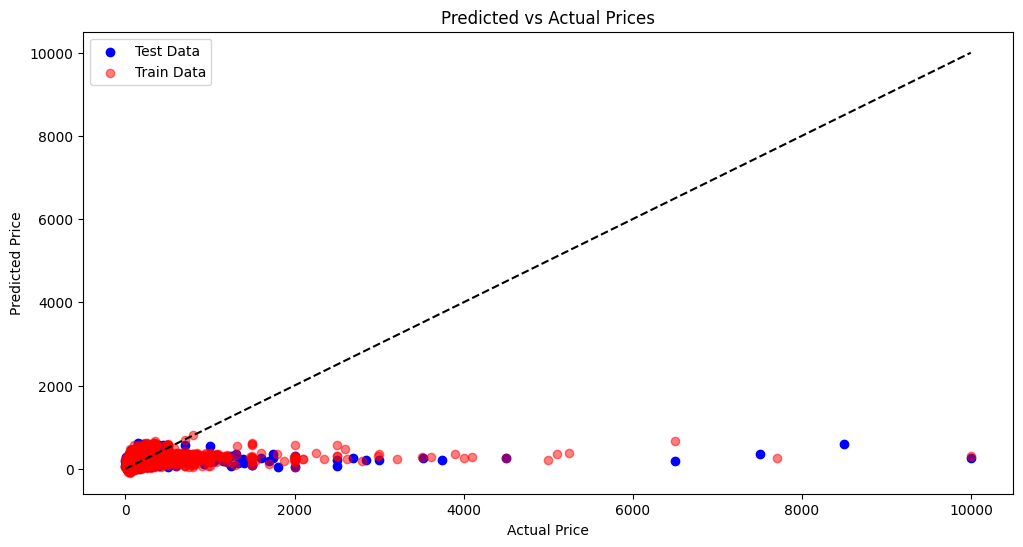

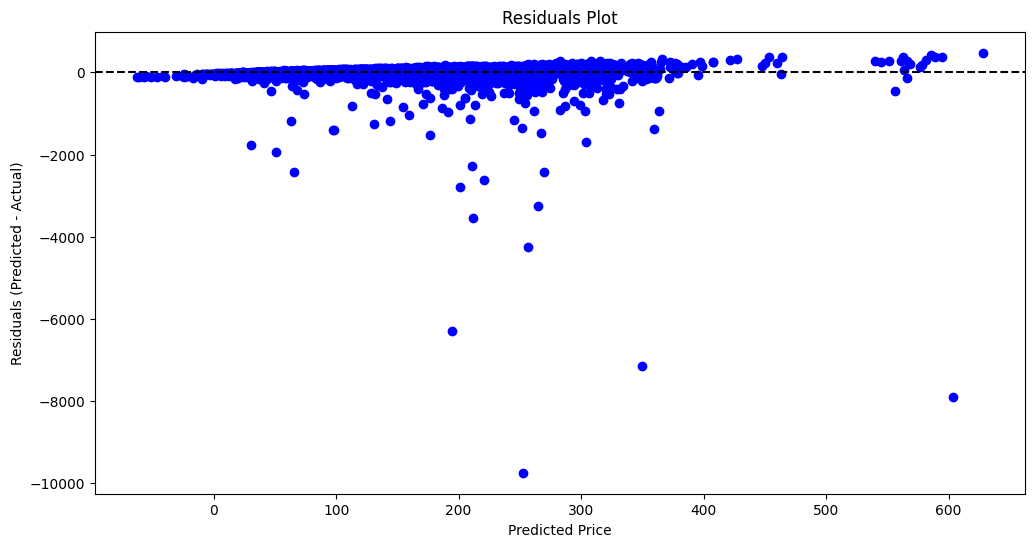

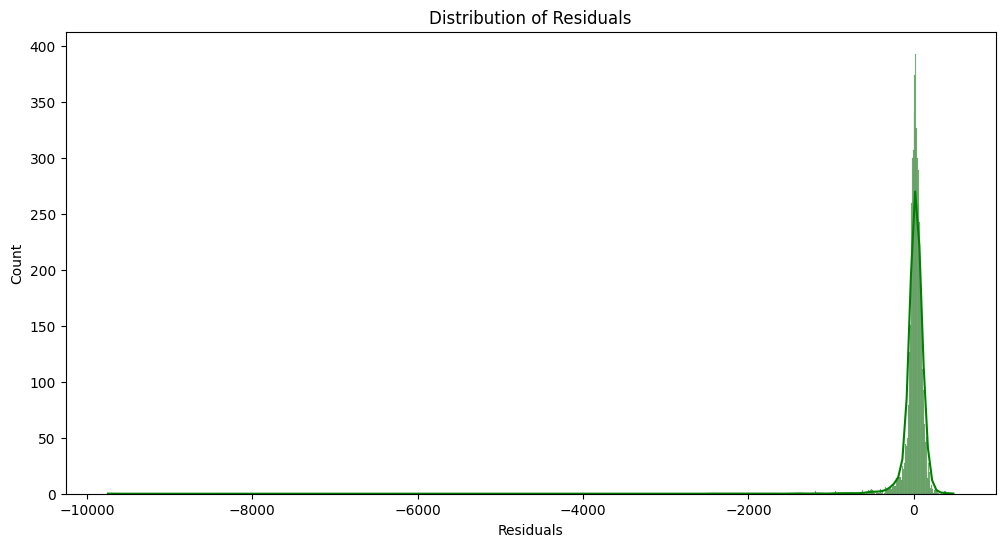

Test Score: 0.09151664878772903
Train Score: 0.14740644949172899


In [13]:

def clean_fit_linear_mod(
    df, response_col, cat_cols, droplist, dummy_na, test_size=0.3, rand_state=42
):
    """
    INPUT:
    df - pandas dataframe with all the variables of interest.
    response_col - string, the name of the column to predict.
    cat_cols - list of strings, names of the categorical columns to dummy.
    dummy_na - bool, whether to create dummy variables for NaN values.
    test_size - float, proportion of data to be used for testing [0, 1].
    rand_state - int, random state for splitting data into train and test sets.

    OUTPUT:
    test_score - float, R² score on the test data.
    train_score - float, R² score on the training data.
    lm_model - sklearn LinearRegression model object.
    X_train, X_test, y_train, y_test - data from train_test_split used
    to build model.
    """
    # Drop rows with missing response values
    df = df.dropna(subset=[response_col], axis=0)

    # Drop columns with all NaN values
    df = df.dropna(how="all", axis=1)

    # Drop unnecessary columns
    df.drop(droplist, axis=1, inplace=True)

    # Convert categorical variables into dummy variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    df = df.apply(fill_mean, axis=0)

    # Split data into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=.30, random_state=42
    )

    # Initialize the linear regression model
    lm_model = LinearRegression()
    lm_model.fit(X_train, y_train) #Fit

    # Initialize the scaler for feature scaling
    #scaler = StandardScaler()

    # Fit and transform the explanatory variables (X) with the scaler
    #X_scaled = scaler.fit_transform(X_train)

    # Train the model with the scaled data
    #lm_model.fit(X_scaled, y_train)

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    # Plotting Predicted vs Actual values
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_test_preds, color='blue', label='Test Data')
    plt.scatter(y_train, y_train_preds, color='red', label='Train Data', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')  # Ideal line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Predicted vs Actual Prices')
    plt.legend()
    plt.show()

    # Plotting Residuals (Predicted - Actual)
    residuals = y_test_preds - y_test
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_preds, residuals, color='blue')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals (Predicted - Actual)')
    plt.title('Residuals Plot')
    plt.show()

    # Plotting distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, kde=True, color='green')
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.show()

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


# Example usage

droplist = ["name", "host_name", "last_review"]
cat_cols_lst = ["neighbourhood_group", "room_type", "neighbourhood"]
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = (
    clean_fit_linear_mod(df, "price", cat_cols_lst, droplist, dummy_na=False)
)
print("Test Score:", test_score)
print("Train Score:", train_score)



**In conclusion, the current linear regression model does not provide a strong fit to the data, and further improvements in feature selection, data preprocessing, or model choice may be necessary to achieve better predictive accuracy.**

## Question 2: Which neighbourhood is most common?

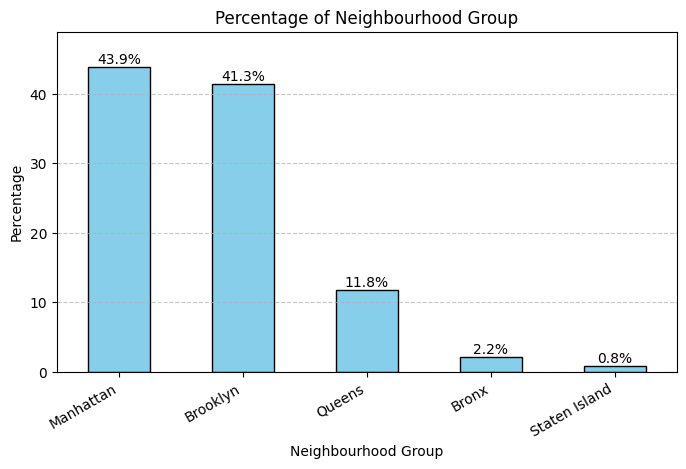

In [14]:
# I want to examine the distribution of neighbourhood group for each
# property as this seems to be an important factor!

# Get counts and normalize by the total number of rows to calculate percentages
status_vals = df["neighbourhood_group"].value_counts()
percent_vals = (status_vals / df.shape[0]) * 100  # Convert to percentages

# Plot the bar chart
fig, ax = plt.subplots()
percent_vals.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.figure.autofmt_xdate()

# Add percentage labels on each bar
for p, val in enumerate(percent_vals):
    ax.text(p, val + 0.5, f"{val:.1f}%", ha="center")

# Chart styling
plt.title("Percentage of Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Percentage")
plt.ylim(0, max(percent_vals) + 5)  # Extend y-axis slightly to fit labels
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Manhattan and Brooklyn seems to be popular neighbourhood for renting in Newyork**

## Question 3: Relation between Reviews and Price


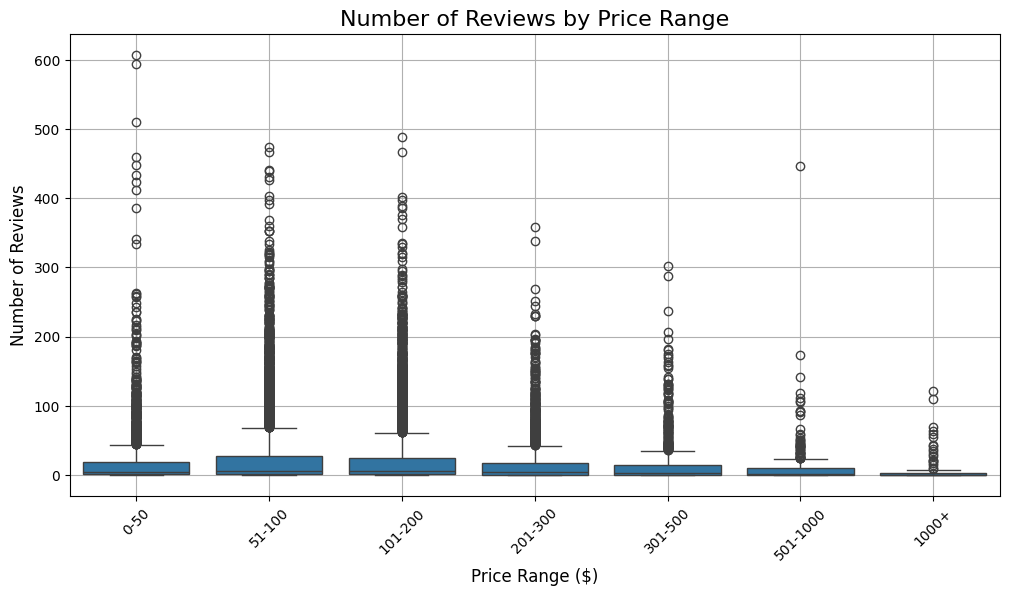

In [15]:
# Create bins for price
bins = [0, 50, 100, 200, 300, 500, 1000, df["price"].max()]
labels = ["0-50", "51-100", "101-200", "201-300", "301-500", "501-1000", "1000+"]
df["price_bins"] = pd.cut(df["price"], bins=bins, labels=labels)

# Boxplot to visualize reviews in each price range
plt.figure(figsize=(12, 6))
sns.boxplot(x="price_bins", y="number_of_reviews", data=df)
plt.title("Number of Reviews by Price Range", fontsize=16)
plt.xlabel("Price Range ($)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
correlation = df['price'].corr(df['number_of_reviews'])
print(f"Correlation between Price and Number of Reviews: {correlation:.2f}")


Correlation between Price and Number of Reviews: -0.05


**A correlation of -0.05 between Price and Number of Reviews indicates a very weak negative relationship between the two variables. This means that, based on the data, there is almost no linear correlation between the price of the listing and the number of reviews it has. In other words, higher-priced listings do not seem to have significantly more or fewer reviews compared to lower-priced listings.**